In [1]:
import numpy as np
import os
from astropy.io import fits
import matplotlib.pyplot as plt

import paco.processing.paco as p
import paco.processing.fullpaco as f_paco
import paco.processing.fastpaco as fastPACO

from paco.util.util import *
import cv2 as cv2
from astropy.convolution import convolve, Gaussian2DKernel, AiryDisk2DKernel
from astropy.modeling.models import Gaussian2D

from matplotlib.colors import LogNorm 
%matplotlib notebook


In [9]:
path_data = os.path.dirname(os.getcwd()) + '/PACO/testData/vip_datasets'
filename = "naco_betapic_cube.fits"

#angles = np.loadtxt(os.path.join(path_data, "parang.txt")
angles = fits.getdata(os.path.join(path_data,"naco_betapic_pa.fits")).flatten()



[-14.267912   -13.392401   -12.25684    -10.956684    -8.347597
  -7.2228966   -5.744787    -2.1064537   -0.29512167   1.4626606
   3.2092059    4.3334284    5.447868     7.0213733    8.986473
  10.291261    13.309094    15.992933    17.360167    21.262423
  23.105358    24.955982    26.731215    27.657173    28.664381
  29.669321    30.793133    31.765902    32.65901     34.96513
  36.58936     37.720547    38.529       39.33586     40.156578
  41.00682     42.199795    43.82773     44.701267    45.786423
  46.7841      48.035995    49.032276    50.958527    51.970264
  52.68902     53.42537     54.169476    54.88107     55.565765
  56.787163    57.95106     58.641865    59.636795    60.781822
  62.33053     64.17627     64.99202     65.60865     66.277916
  67.098564  ]


(61, 100, 100)
(100, 100)


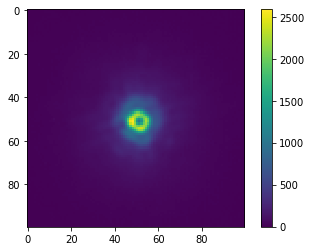

In [10]:
data = fits.getdata(os.path.join(path_data, filename))[:,:-1,:-1]
print(np.shape(data))
plt.imshow(data[0].T)
print(np.shape(data[0]))
plt.colorbar()

(39, 39)
(39, 39)


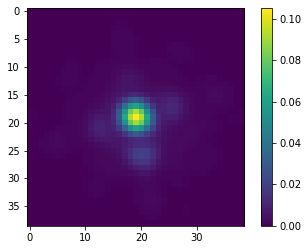

In [14]:
psf = fits.getdata(os.path.join(path_data, "naco_betapic_psf.fits"))
print(np.shape(psf))
plt.imshow(psf.T)
print(np.shape(psf))
plt.colorbar()

## Full PACO 

In [4]:
#fp = f_paco.FullPACO(patch_size = 49)

In [5]:
#fp.setImageSequence(rot_images)
#a,b = fp.PACO(angles,scale = 1)

In [6]:
#phi0s = np.array([[30,30]])
#a,b = fp.PACO(angles)


In [7]:
#img = b/np.sqrt(a)
#plt.imshow(img, origin='lower')

#clb = plt.colorbar()
#clb.ax.set_title('SNR')

In [8]:
#plt.imshow(1/np.sqrt(a), origin='lower')

#clb = plt.colorbar()

Notes: 

As the signal of the source increases, it pushes a_ij and b_ij towards 0
Both a and b are rotated 90 degrees from the source image.

In [9]:
#plt.imshow(b.T, origin='lower')

#clb = plt.colorbar()

## Fast PACO

In [15]:
fp = fastPACO.FastPACO(image_stack = data,
                       psf = psf,
                       angles = angles,
                       psf_rad = 6,
                       px_scale = 1,
                       res_scale = 1)

#%prun fp.PACO(angles,scale = 1, model_name=psftemplate_model, params={"psf_template":s})
a,b = fp.PACO(cpu = 1)

Precomputing Statistics...
Running PACO...
Done


Text(0.5, 1.0, 'SNR')

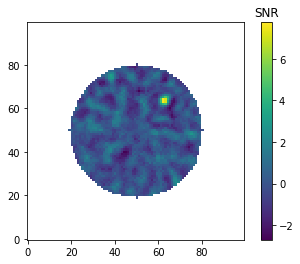

In [20]:
img = b/np.sqrt(a)
plt.imshow(img.T, origin='lower')

clb = plt.colorbar()
clb.ax.set_title('SNR')

Text(0.5, 1.0, 'Flux')

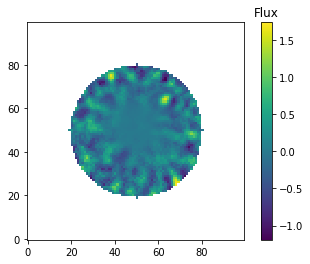

In [21]:
plt.imshow(b.T, origin='lower')

clb = plt.colorbar()
clb.ax.set_title('Flux')

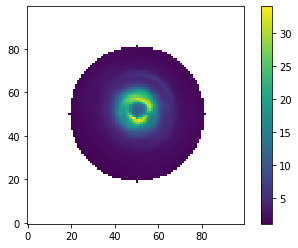

In [22]:
plt.imshow((1/np.sqrt(a)).T, origin='lower')

clb = plt.colorbar()

## PCA

In [ ]:
data_pca = fits.getdata(os.path.join(path_data, "PSFsub_mask0.05.fits"))

In [ ]:
plt.imshow(data_pca[6], origin='lower')

clb = plt.colorbar()
